In [49]:
!pip install pandas matplotlib

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Make plots a bit bigger
plt.rcParams['figure.figsize'] = (8, 5)


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [52]:
coupon = pd.read_csv("in-vehicle-coupon-recommendation.csv")
display(coupon.head())

destination  passanger weather  temperature  time  \
0  No Urgent Place      Alone   Sunny           55   2PM   
1  No Urgent Place  Friend(s)   Sunny           80  10AM   
2  No Urgent Place  Friend(s)   Sunny           80  10AM   
3  No Urgent Place  Friend(s)   Sunny           80   2PM   
4  No Urgent Place  Friend(s)   Sunny           80   2PM   

                  coupon expiration  gender age      maritalStatus  ...  \
0        Restaurant(<20)         1d  Female  21  Unmarried partner  ...   
1           Coffee House         2h  Female  21  Unmarried partner  ...   
2  Carry out & Take away         2h  Female  21  Unmarried partner  ...   
3           Coffee House         2h  Female  21  Unmarried partner  ...   
4           Coffee House         1d  Female  21  Unmarried partner  ...   

   CoffeeHouse CarryAway RestaurantLessThan20 Restaurant20To50  \
0        never       NaN                  4~8              1~3   
1        never       NaN                  4~8              1~3   
2        never       NaN                  4~8              1~3   
3        never       NaN                  4~8              1~3   
4        never       NaN                  4~8              1~3   

  toCoupon_GEQ5min toCoupon_GEQ15min toCoupon_GEQ25min direction_same  \
0                1                 0                 0              0   
1                1                 0                 0              0   
2                1                 1                 0              0   
3                1                 1                 0              0   
4                1                 1                 0              0   

  direction_opp  Y  
0             1  1  
1             1  0  
2             1  1  
3             1  0  
4             1  0  

[5 rows x 26 columns]

In [55]:
coupon = coupon.rename(columns={'passanger': 'passenger'})

In [58]:
coupon.duplicated().sum()

74

In [61]:
coupon[coupon.duplicated()] 

destination passenger weather  temperature  time                 coupon  \
4192        Work     Alone   Sunny           80   7AM  Carry out & Take away   
4236        Work     Alone   Sunny           80   7AM  Carry out & Take away   
4280        Work     Alone   Sunny           80   7AM  Carry out & Take away   
4324        Work     Alone   Sunny           80   7AM  Carry out & Take away   
4409        Work     Alone   Sunny           80   7AM  Carry out & Take away   
...          ...       ...     ...          ...   ...                    ...   
8511        Home     Alone   Sunny           80   6PM                    Bar   
8512        Home   Partner   Sunny           30  10PM  Carry out & Take away   
8513        Work     Alone   Rainy           55   7AM        Restaurant(<20)   
8515        Work     Alone   Snowy           30   7AM      Restaurant(20-50)   
8516        Work     Alone   Sunny           80   7AM        Restaurant(<20)   

     expiration  gender age    maritalStatus  ...  CoffeeHouse CarryAway  \
4192         1d    Male  26           Single  ...        never       1~3   
4236         1d    Male  26           Single  ...          gt8       gt8   
4280         1d  Female  26           Single  ...        never       4~8   
4324         1d  Female  46           Single  ...        never       4~8   
4409         1d  Female  21           Single  ...        never     less1   
...         ...     ...  ..              ...  ...          ...       ...   
8511         2h    Male  46  Married partner  ...          1~3       1~3   
8512         2h    Male  46  Married partner  ...          1~3       1~3   
8513         2h    Male  46  Married partner  ...          1~3       1~3   
8515         1d    Male  46  Married partner  ...          1~3       1~3   
8516         1d    Male  46  Married partner  ...          1~3       1~3   

     RestaurantLessThan20 Restaurant20To50 toCoupon_GEQ5min toCoupon_GEQ15min  \
4192                less1            less1                1                 1   
4236                  4~8            less1                1                 1   
4280                  1~3            less1                1                 1   
4324                  1~3              1~3                1                 1   
4409                  1~3            never                1                 1   
...                   ...              ...              ...               ...   
8511                less1              1~3                1                 0   
8512                less1              1~3                1                 1   
8513                less1              1~3                1                 1   
8515                less1              1~3                1                 1   
8516                less1              1~3                1                 0   

     toCoupon_GEQ25min direction_same direction_opp  Y  
4192                 1              0             1  1  
4236                 1              0             1  1  
4280                 1              0             1  1  
4324                 1              0             1  1  
4409                 1              0             1  0  
...                ...            ...           ... ..  
8511                 0              1             0  1  
8512                 0              0             1  1  
8513                 1              0             1  0  
8515                 1              0             1  0  
8516                 0              1             0  1  

[74 rows x 26 columns]

In [64]:
coupon = coupon.drop_duplicates()
coupon.duplicated().sum()

0

In [67]:
coupon.isnull().sum()

destination                 0
passenger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12502
Bar                       107
CoffeeHouse               217
CarryAway                 150
RestaurantLessThan20      129
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [73]:
coupon.describe()

temperature  has_children  toCoupon_GEQ5min  toCoupon_GEQ15min  \
count  12610.000000  12610.000000           12610.0       12610.000000   
mean      63.267248      0.414512               1.0           0.559794   
std       19.153386      0.492657               0.0           0.496432   
min       30.000000      0.000000               1.0           0.000000   
25%       55.000000      0.000000               1.0           0.000000   
50%       80.000000      0.000000               1.0           1.000000   
75%       80.000000      1.000000               1.0           1.000000   
max       80.000000      1.000000               1.0           1.000000   

       toCoupon_GEQ25min  direction_same  direction_opp             Y  
count       12610.000000    12610.000000   12610.000000  12610.000000  
mean            0.116019        0.215543       0.784457      0.567565  
std             0.320260        0.411215       0.411215      0.495434  
min             0.000000        0.000000       0.000000      0.000000  
25%             0.000000        0.000000       1.000000      0.000000  
50%             0.000000        0.000000       1.000000      1.000000  
75%             0.000000        0.000000       1.000000      1.000000  
max             1.000000        1.000000       1.000000      1.000000

In [76]:
coupon = coupon.drop(columns = ['car', 'direction_opp', 'toCoupon_GEQ5min'])

In [79]:
coupon.dtypes

destination             object
passenger               object
weather                 object
temperature              int64
time                    object
coupon                  object
expiration              object
gender                  object
age                     object
maritalStatus           object
has_children             int64
education               object
occupation              object
income                  object
Bar                     object
CoffeeHouse             object
CarryAway               object
RestaurantLessThan20    object
Restaurant20To50        object
toCoupon_GEQ15min        int64
toCoupon_GEQ25min        int64
direction_same           int64
Y                        int64
dtype: object

In [82]:
# convert object type variables to categorical
for col in coupon.select_dtypes(include='object').columns:
    coupon[col] = coupon[col].astype('category')

# convert temperature (already bucketed) into clearer categories
coupon['temperature'] = coupon['temperature'].map({
    30: 'Cold',
    55: 'Cool',
    80: 'Warm'
})

# convert temperature to categorical type
coupon['temperature'] = coupon['temperature'].astype('category')

# updated data types
coupon.dtypes


destination             category
passenger               category
weather                 category
temperature             category
time                    category
coupon                  category
expiration              category
gender                  category
age                     category
maritalStatus           category
has_children               int64
education               category
occupation              category
income                  category
Bar                     category
CoffeeHouse             category
CarryAway               category
RestaurantLessThan20    category
Restaurant20To50        category
toCoupon_GEQ15min          int64
toCoupon_GEQ25min          int64
direction_same             int64
Y                          int64
dtype: object

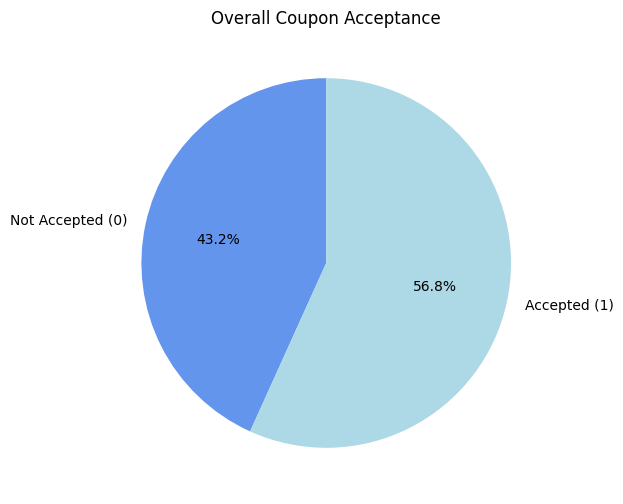

In [94]:
y_counts = coupon['Y'].value_counts().sort_index()
labels = ['Not Accepted (0)', 'Accepted (1)']

fig, ax = plt.subplots(figsize=(6,6))
ax.pie(y_counts, labels=labels, autopct='%1.1f%%',
       startangle=90, colors=['#6495ED', '#ADD8E6'])
ax.set_title("Overall Coupon Acceptance")
plt.show()


/tmp/ipykernel_254/3156544607.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  coupon.groupby('coupon')['Y'].mean().sort_values().plot(kind='bar', color='steelblue')


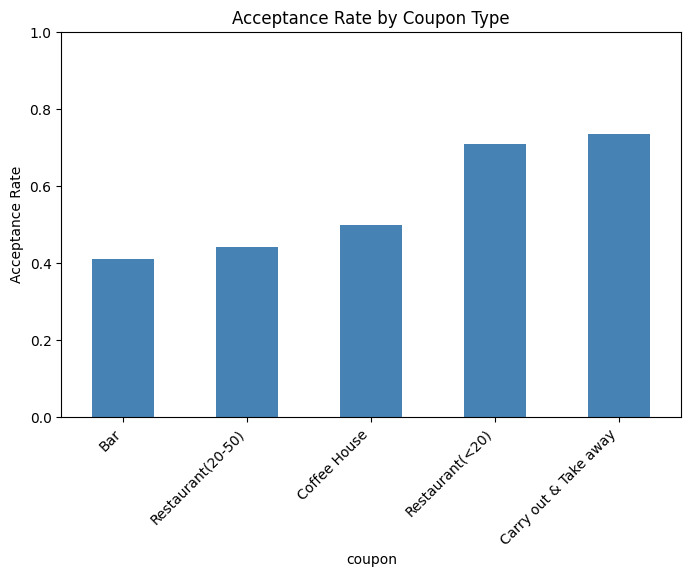

In [88]:
coupon.groupby('coupon')['Y'].mean().sort_values().plot(kind='bar', color='steelblue')
plt.title("Acceptance Rate by Coupon Type")
plt.ylabel("Acceptance Rate")
plt.ylim(0,1)
plt.xticks(rotation=45, ha='right')
plt.show()

/tmp/ipykernel_254/3064106662.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  acc_time = coupon.groupby('time')['Y'].mean().reindex(time_order)


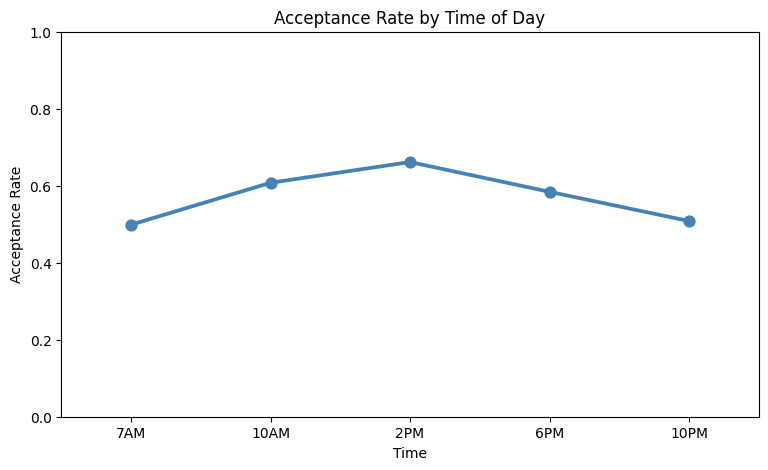

In [91]:
time_order = ['7AM', '10AM', '2PM', '6PM', '10PM']
acc_time = coupon.groupby('time')['Y'].mean().reindex(time_order)

plt.figure(figsize=(9,5))
sns.pointplot(x=acc_time.index, y=acc_time.values, color='steelblue')
plt.title("Acceptance Rate by Time of Day")
plt.ylabel("Acceptance Rate")
plt.ylim(0, 1)
plt.xlabel("Time")
plt.show()

/tmp/ipykernel_254/2600153341.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  acc = coupon.groupby(['coupon','time'])['Y'].mean().reset_index()


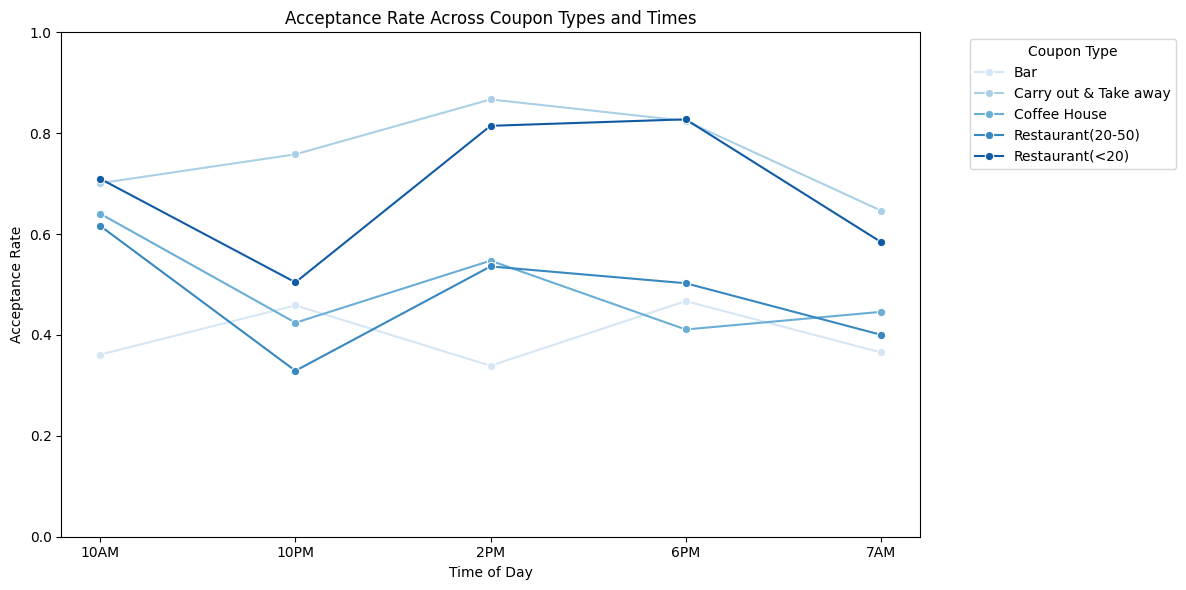

In [97]:
acc = coupon.groupby(['coupon','time'])['Y'].mean().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=acc, x="time", y="Y", hue="coupon", marker="o", palette='Blues')
plt.title("Acceptance Rate Across Coupon Types and Times")
plt.ylabel("Acceptance Rate")
plt.ylim(0,1)
plt.xlabel("Time of Day")
plt.legend(title="Coupon Type", bbox_to_anchor=(1.05,1))
plt.tight_layout()
plt.show()

/tmp/ipykernel_254/4085075301.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  acc_pass = coupon.groupby('passenger')['Y'].mean().sort_values()


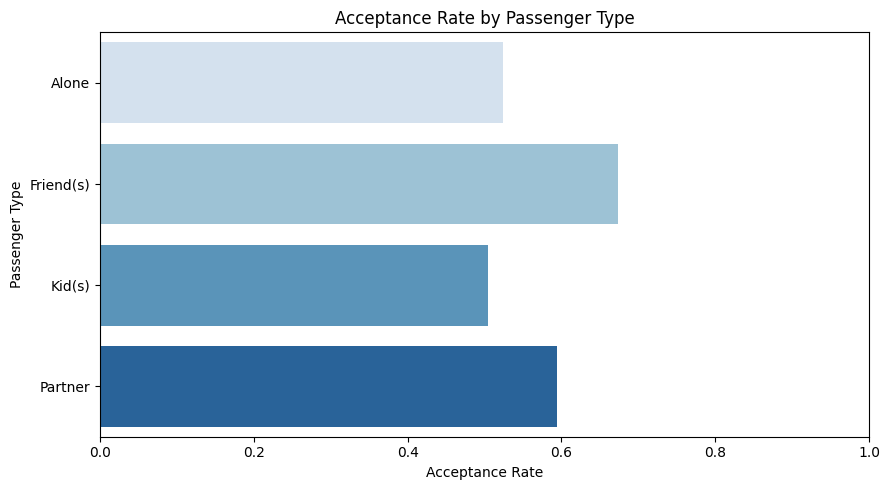

In [103]:
acc_pass = coupon.groupby('passenger')['Y'].mean().sort_values()

plt.figure(figsize=(9,5))
sns.barplot(
    x=acc_pass.values,
    y=acc_pass.index,
    hue=acc_pass.index,
    palette="Blues",
    legend=False
)

plt.title("Acceptance Rate by Passenger Type")
plt.xlabel("Acceptance Rate")
plt.xlim(0,1)
plt.ylabel("Passenger Type")
plt.tight_layout()
plt.show()

/tmp/ipykernel_254/343834226.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  acc_income = coupon.groupby('income')['Y'].mean().sort_values()


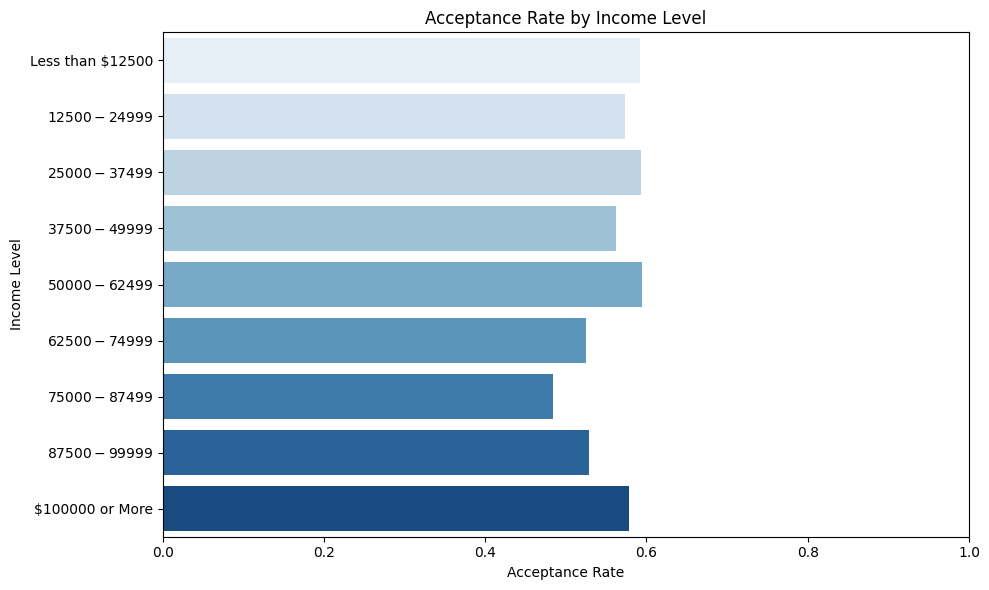

In [109]:
income_order = [
    'Less than $12500',
    '$12500 - $24999',
    '$25000 - $37499',
    '$37500 - $49999',
    '$50000 - $62499',
    '$62500 - $74999',
    '$75000 - $87499',
    '$87500 - $99999',
    '$100000 or More'
]
coupon['income'] = pd.Categorical(coupon['income'], categories=income_order, ordered=True)

acc_income = coupon.groupby('income')['Y'].mean().sort_values()

plt.figure(figsize=(10,6))
sns.barplot(x=acc_income.values, y=acc_income.index, hue=acc_income.index, palette='Blues', legend=False)
plt.title("Acceptance Rate by Income Level")
plt.xlabel("Acceptance Rate")
plt.ylabel("Income Level")
plt.xlim(0,1)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()